<a href="https://colab.research.google.com/github/jhj030722/Kaggle_study_2024_1/blob/main/4%EC%A3%BC%EC%B0%A8_%EC%BA%90%EA%B8%80%EC%8A%A4%ED%84%B0%EB%94%94_world_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# 0 . Read Dataset

In [ ]:
y_2015 = pd.read_csv('/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2015.csv')
y_2016 = pd.read_csv('/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2016.csv')
y_2017 = pd.read_csv('/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2017.csv')
y_2018 = pd.read_csv('/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2018.csv')
y_2019 = pd.read_csv('/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2019.csv')
y_2020 = pd.read_csv('/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2020.csv')

In [ ]:
# 파일 경로 지정
file_paths = ['/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2015.csv',
              '/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2016.csv',
              '/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2017.csv',
              '/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2018.csv',
              '/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2019.csv',
              '/content/drive/MyDrive/DART-B/캐글 스터디/archive (9)/2020.csv']

# 각 연도별 데이터 불러와서 리스트에 저장
data_frames = [pd.read_csv(file_path) for file_path in file_paths]

# 데이터 프레임들을 하나의 데이터 프레임으로 결합
Data = pd.concat(data_frames, ignore_index=True)

# 세 번째 열 선택
x = Data.iloc[:, [3]].values


In [ ]:
# Data= y_2015.append([y_2015,y_2016,y_2017,y_2018, y_2019,y_2020])
# x = Data.iloc[:, [3]].values 이렇게 하니까 User AttributeError: 'DataFrame' object has no attribute 'append'가 뜨는데 이유가 뭔지
#  이 오류는 DataFrame 객체가 실제로 append 메서드를 포함하지 않기 때문에 발생했다고 하는데 이해를 잘 못하겠

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 49 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     935 non-null    object 
 1   Region                                      935 non-null    object 
 2   Happiness Rank                              935 non-null    float64
 3   Happiness Score                             935 non-null    float64
 4   Standard Error                              935 non-null    float64
 5   Economy (GDP per Capita)                    935 non-null    float64
 6   Family                                      935 non-null    float64
 7   Health (Life Expectancy)                    935 non-null    float64
 8   Freedom                                     935 non-null    float64
 9   Trust (Government Corruption)               935 non-null    float64
 10  Generosity    

In [ ]:
Data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check Missing data

In [ ]:
print("Any missing sample in train set:" , Data.isnull().values.any(), "\n")

Any missing sample in train set: True 



# 1 . Handling missing data

In [ ]:
Data = Data.replace([np.inf, -np.inf], np.nan)         #데이터프레임(DataFrame)에서 무한대(inf) 또는 음의 무한대(-inf) 값을 NaN(Not a Number) 값으로 대체하는 작업을 수행
Data = Data.fillna(0)   #결측치를 0으로 채우기
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.250141,6.625160,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.209547,7.600104,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.184198,7.865712,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,2.605684,7.425360,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


935행 => 935개국..??

#  2.Happiness Country by Happiness_Rank

In [ ]:
Data['Happiness_Rank'] = Data['Happiness Rank']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6.625160,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0
931,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.600104,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0
932,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.865712,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0
933,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.425360,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0


## Distributional data of Happiness_Rank

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distributional data of Happiness Rank')

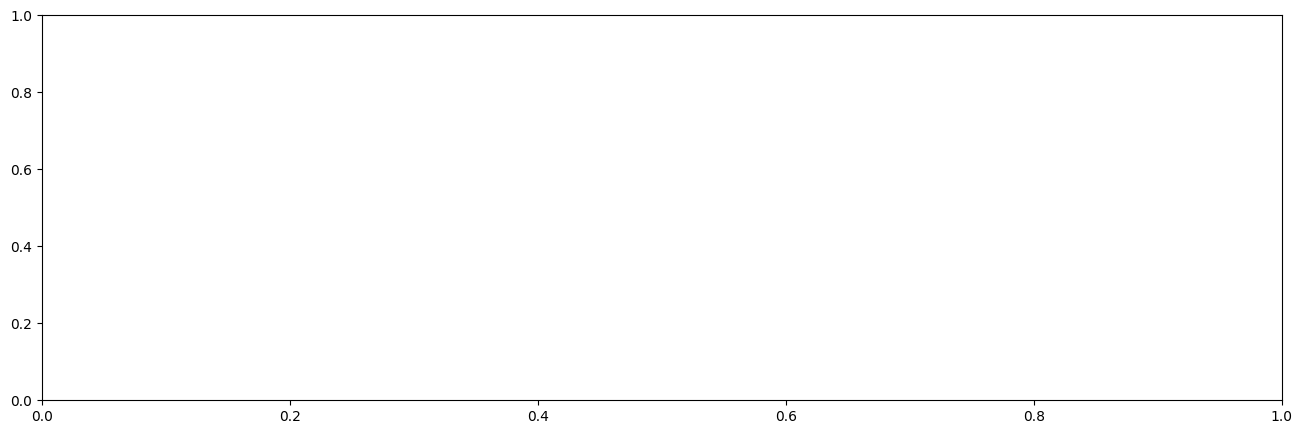

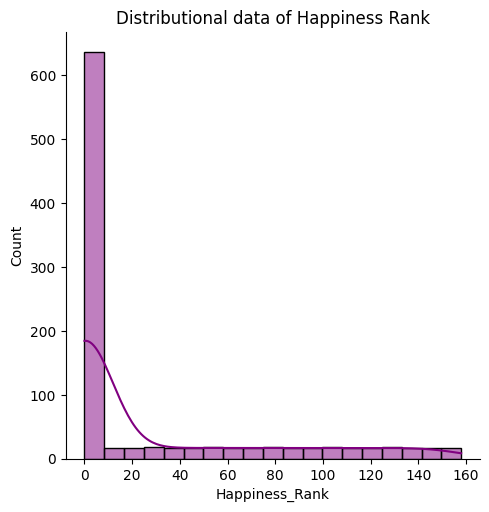

In [ ]:
f, axes = plt.subplots(1,1, figsize=(16,5))
gl = sns.displot(Data['Happiness_Rank'], color='purple', ax = axes,  kde=True)
plt.title('Distributional data of Happiness Rank')

## Countplot of happiness country by happiness rank

<ipython-input-12-45e2a24efd73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Happiness_c.Country, x=Happiness_c.Happiness_Rank,palette="rocket")


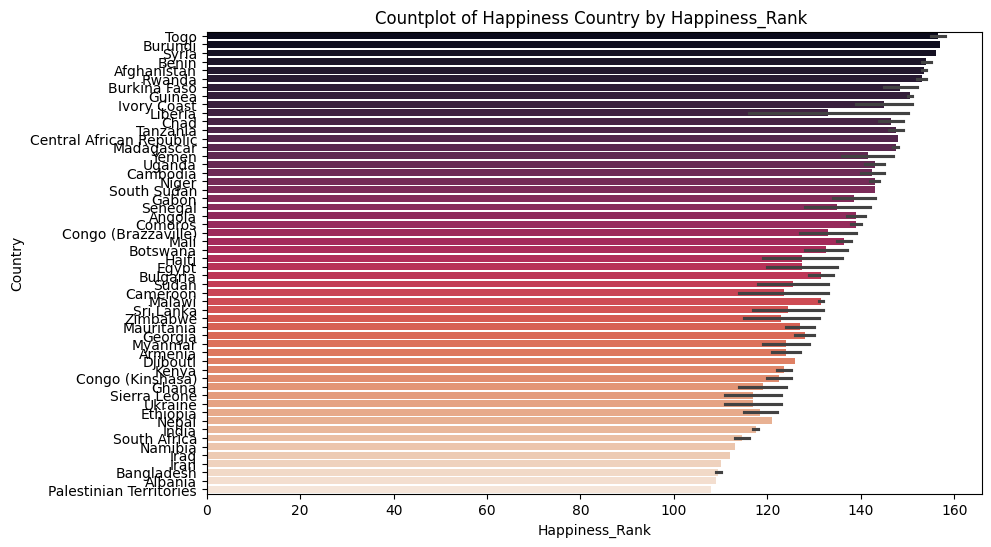

In [ ]:
Happiness_c = Data.sort_values(by='Happiness_Rank', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness_c.Country, x=Happiness_c.Happiness_Rank,palette="rocket")
plt.xticks()
plt.xlabel('Happiness_Rank')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Happiness_Rank ')
plt.show()

## 상위 10개국

In [ ]:


# Happiness Rank가 0.0인 행을 결측치(NaN)으로 처리
Data['Happiness_Rank'].replace(0.0, np.nan, inplace=True)


<ipython-input-103-25b2f3531a14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness_Rank', y='Country', data=top_10_happiness_rank, palette='coolwarm')


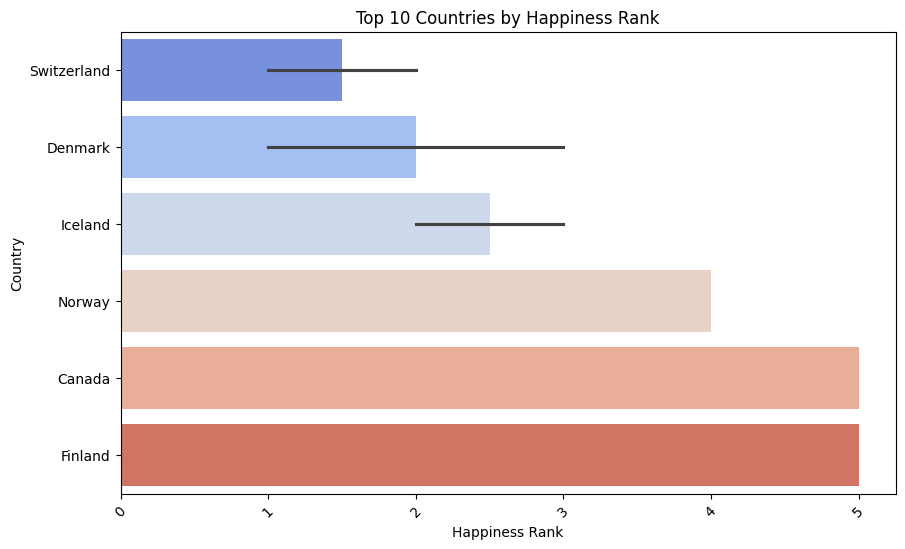

In [ ]:
# 결측치를 제외하고 상위 10개 나라 선택
top_10_happiness_rank = Data.dropna(subset=['Happiness_Rank']).sort_values(by='Happiness_Rank')[:10]

# 선택된 데이터를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness_Rank', y='Country', data=top_10_happiness_rank, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Happiness Rank')
plt.ylabel('Country')
plt.title('Top 10 Countries by Happiness Rank')
plt.show()

# 3.Happiness_country by Happiness_score

In [ ]:
Data['Happiness Score'] = Data['Happiness.Score']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank
0,Switzerland,Western Europe,1.0,0.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,Iceland,Western Europe,2.0,0.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2,Denmark,Western Europe,3.0,0.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
3,Norway,Western Europe,4.0,0.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
4,Canada,North America,5.0,0.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6.625160,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0
931,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.600104,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0
932,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.865712,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0
933,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.425360,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0


## Distributional data of Happiness_Score

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distributional data of Happiness_Score')

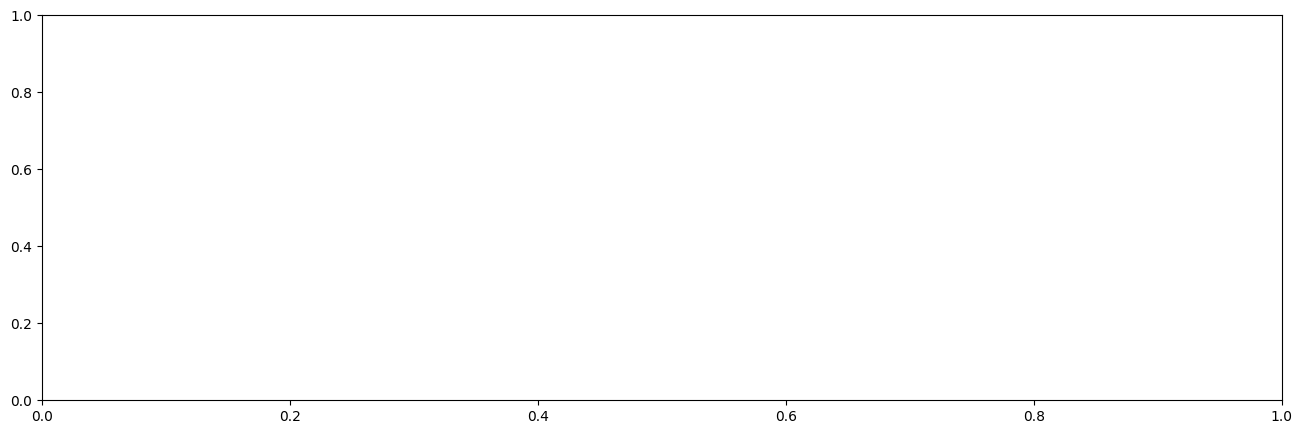

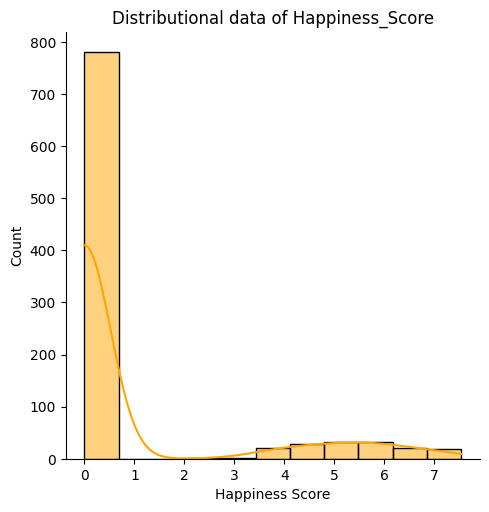

In [ ]:
f2, axes = plt.subplots(1, 1, figsize = (16,5))
g1 = sns.displot(Data['Happiness Score'], color='orange', ax= axes,  kde=True)
plt.title('Distributional data of Happiness_Score')

## Countplot of Happiness Country by Happiness Score

<ipython-input-15-8378ae98a0fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Happiness_c.Country, x=Happiness_c['Happiness Score'], palette="coolwarm")             #열이름이 Happiness score이니까 띄어쓰기가 안됨.그래서 ['Happiness score']이렇게 처리함


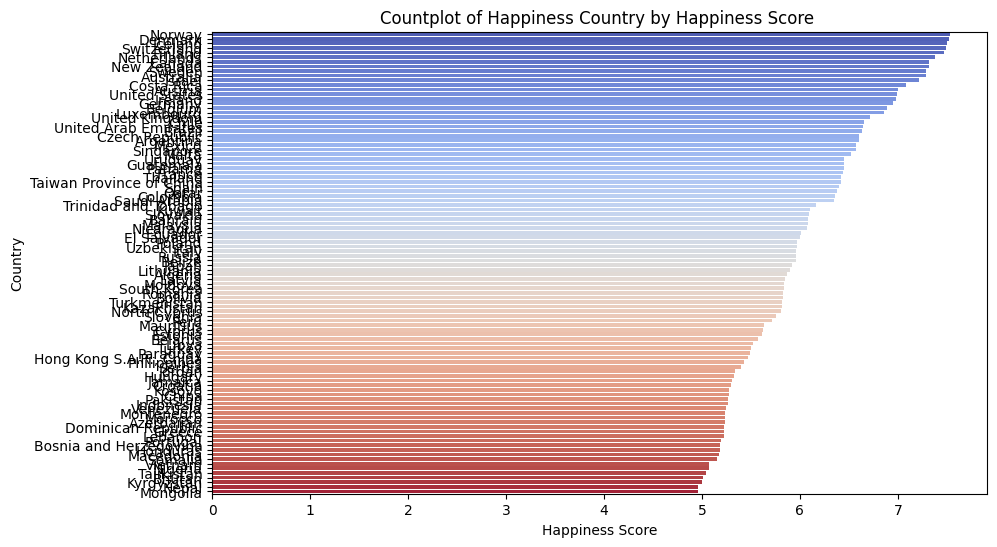

In [ ]:
Happiness_c= Data.sort_values(by='Happiness Score', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness_c.Country, x=Happiness_c['Happiness Score'], palette="coolwarm")             #열이름이 Happiness score이니까 띄어쓰기가 안됨.그래서 ['Happiness score']이렇게 처리함
plt.xticks()
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Happiness Score ')
plt.show()


## 상위 10개국

<ipython-input-87-993b4b57f948>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_happy_countries.Country, x=top_10_happy_countries['Happiness Score'], palette="coolwarm")


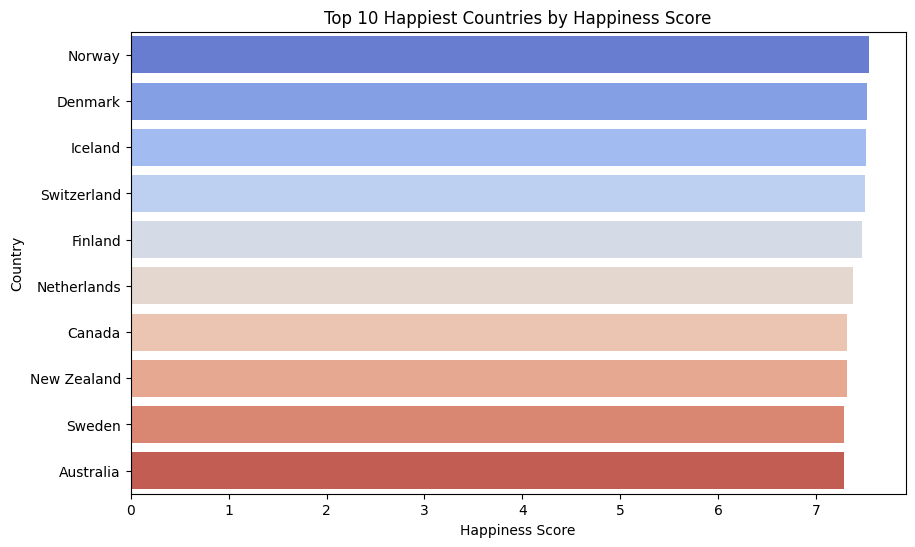

In [ ]:
# 상위 10개 나라 선택
top_10_happy_countries = Data.sort_values(by='Happiness Score', ascending=False)[:10]

figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_10_happy_countries.Country, x=top_10_happy_countries['Happiness Score'], palette="coolwarm")
plt.xticks()
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries by Happiness Score')
plt.show()

# 4.Economy (GDP per Capita)

In [ ]:
Data['Ecnomy_GDPperCapita'] = Data['Economy (GDP per Capita)']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank,Ecnomy_GDPperCapita
0,Switzerland,Western Europe,1.0,0.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.39651
1,Iceland,Western Europe,2.0,0.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.30232
2,Denmark,Western Europe,3.0,0.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,1.32548
3,Norway,Western Europe,4.0,0.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,1.45900
4,Canada,North America,5.0,0.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,1.32629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0,0.00000
931,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0,0.00000
932,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0,0.00000
933,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0,0.00000


## Distributional of Economy_GDPperCapita

<ipython-input-22-95ac9ba58600>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(Data['Economy (GDP per Capita)'], color="brown",ax = axes)


Text(0.5, 1.0, 'Distributional data of Economy GDP per Capita')

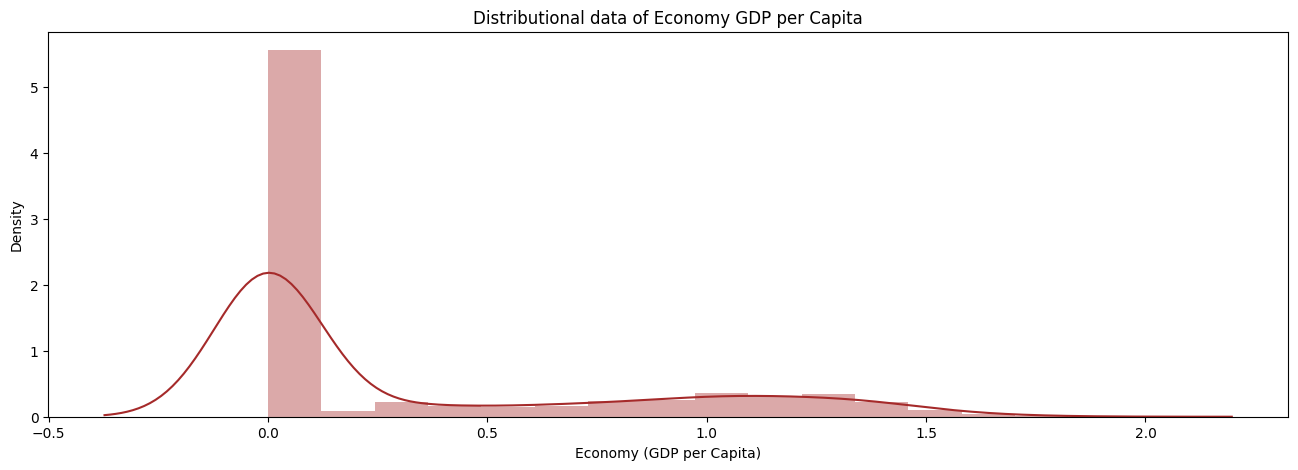

In [ ]:
f3, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data['Economy (GDP per Capita)'], color="brown",ax = axes)
plt.title("Distributional data of Economy GDP per Capita")

## Countplot of Economy (GDP per Capita) each Country

<ipython-input-29-c00403b9fbb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=GDP.Country, x=GDP['Economy (GDP per Capita)'], palette='viridis')


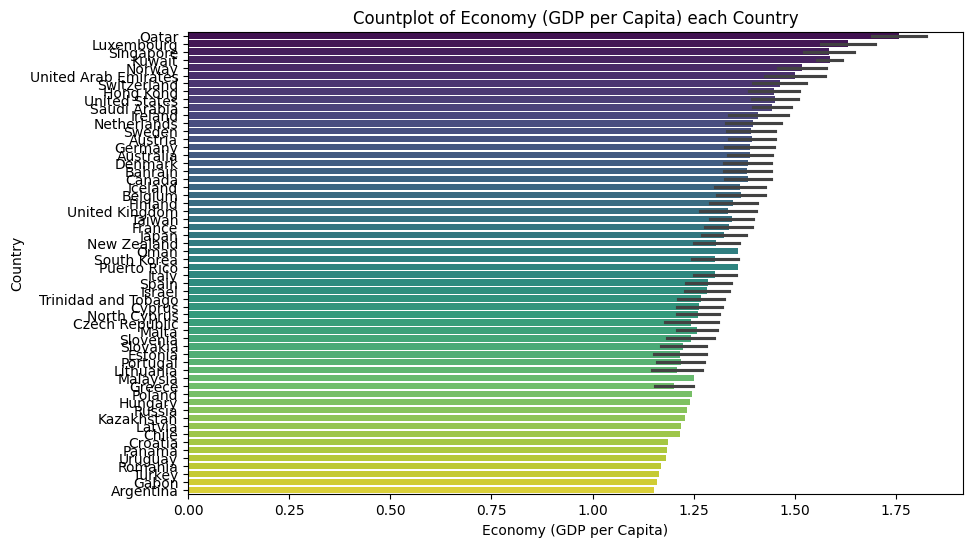

In [ ]:
GDP = Data.sort_values(by='Economy (GDP per Capita)', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=GDP.Country, x=GDP['Economy (GDP per Capita)'], palette='viridis')
plt.xticks()
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Country')
plt.title('Countplot of Economy (GDP per Capita) each Country')
plt.show()


## 상위 10개국

<ipython-input-88-919b4ed4c917>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_happy_countries.Country, x=top_10_happy_countries['Economy (GDP per Capita)'], palette="coolwarm")


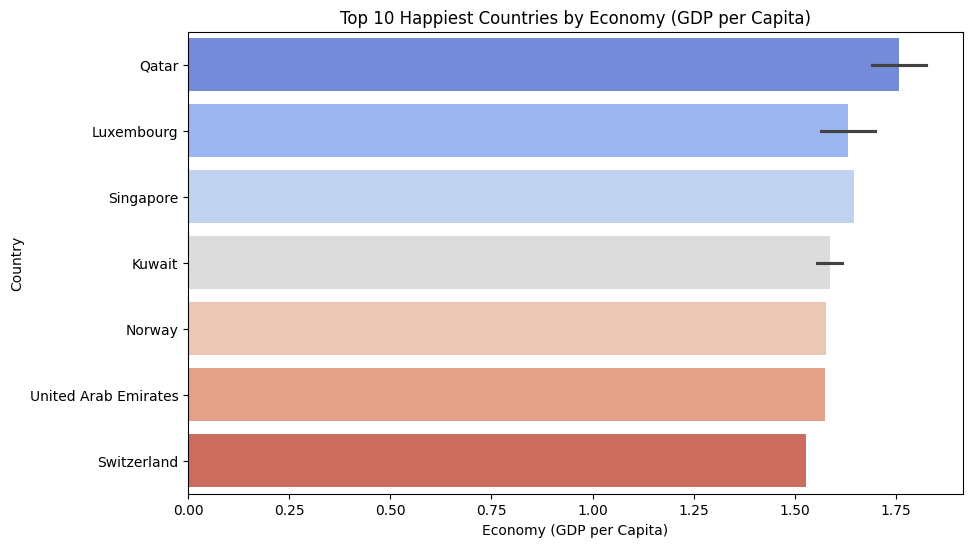

In [ ]:
# 상위 10개 나라 선택
top_10_happy_countries = Data.sort_values(by='Economy (GDP per Capita)', ascending=False)[:10]

figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_10_happy_countries.Country, x=top_10_happy_countries['Economy (GDP per Capita)'], palette="coolwarm")
plt.xticks()
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries by Economy (GDP per Capita)')
plt.show()

#  5.Happiness Country by Family

## ** Distributional data of Family **

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distributional data of Family')

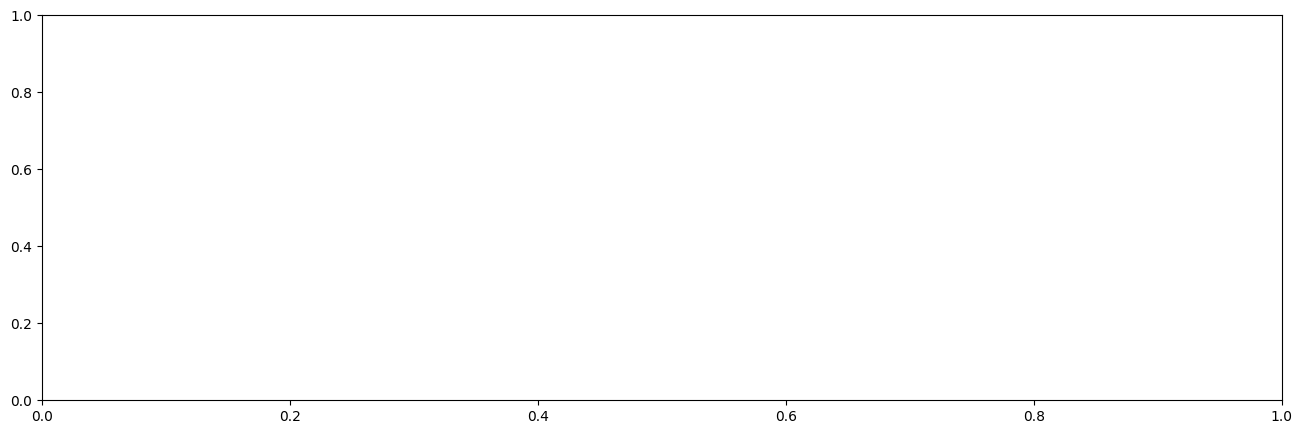

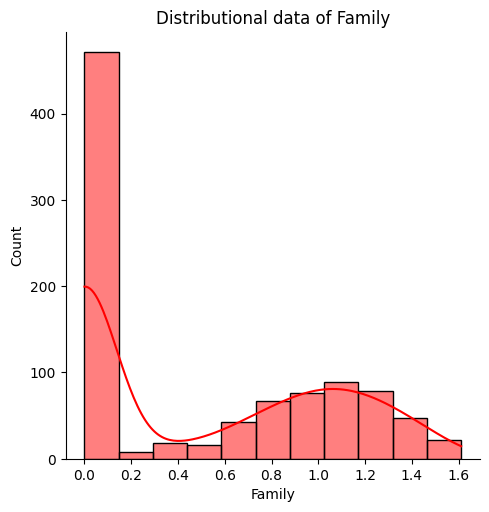

In [ ]:
f4, axes = plt.subplots(1,1, figsize = (16,5))
g1 = sns.displot(Data["Family"], color="red", ax = axes,  kde=True)
plt.title('Distributional data of Family')

## ** Countplot of Happiness Country by Family **

<ipython-input-31-b185cddce9c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Fam_c.Country, x=Fam_c.Family, palette='Accent_r')


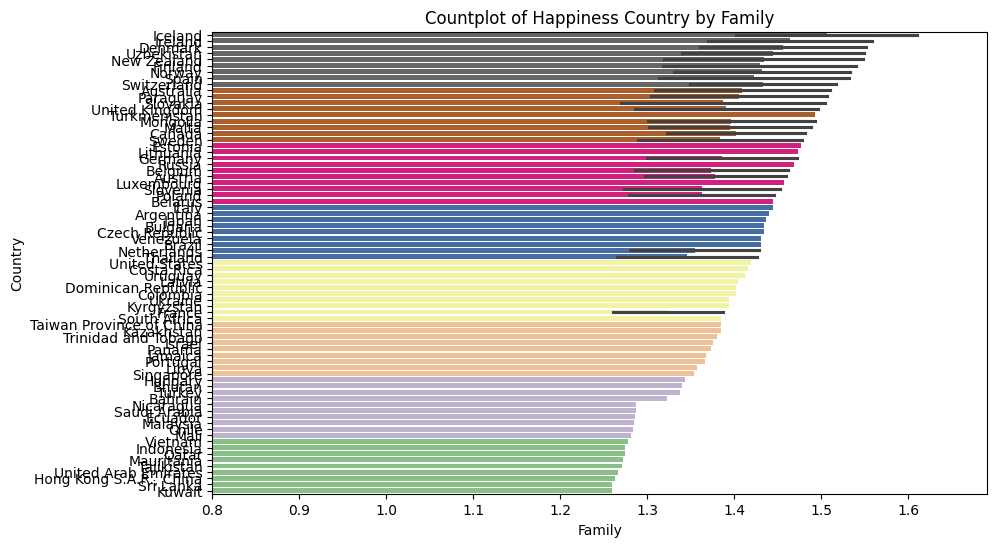

In [ ]:
Fam_c = Data.sort_values(by='Family', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Fam_c.Country, x=Fam_c.Family, palette='Accent_r')
plt.xticks()
plt.xlim(xmin=0.8) #그래프에서 x 축의 값이 0.8보다 작은 부분은 잘려서 보이지 않도록
plt.xlabel('Family')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Family')
plt.show()

## 상위 10개국

<ipython-input-89-c97f99ce1d08>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_happy_countries.Country, x=top_10_happy_countries['Family'], palette="coolwarm")


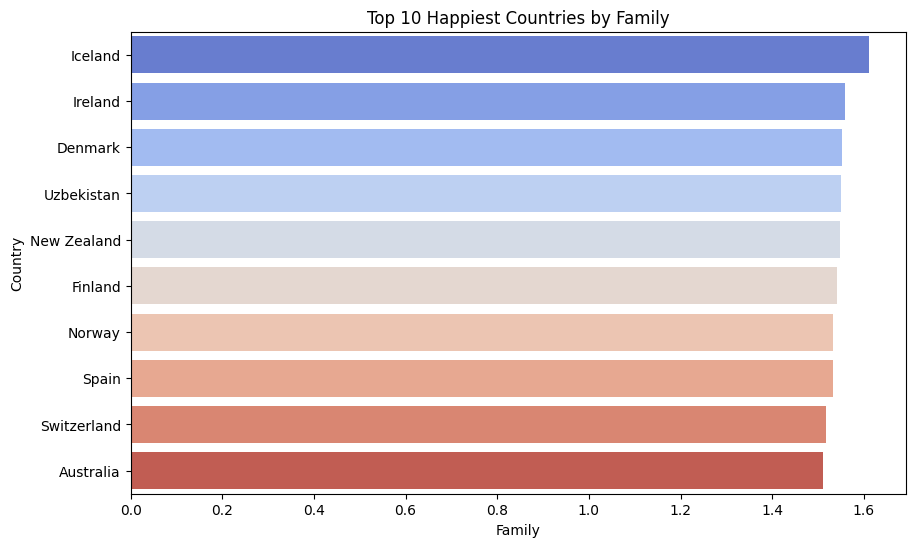

In [ ]:
# 상위 10개 나라 선택
top_10_happy_countries = Data.sort_values(by='Family', ascending=False)[:10]

figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_10_happy_countries.Country, x=top_10_happy_countries['Family'], palette="coolwarm")
plt.xticks()
plt.xlabel('Family')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries by Family')
plt.show()

# 6.Happiness Country by Freedom

## Distributional data of Freedom

<ipython-input-33-21a18053356e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(Data["Freedom"], color="skyblue",ax = axes)


Text(0.5, 1.0, 'Distributional data of Freedom')

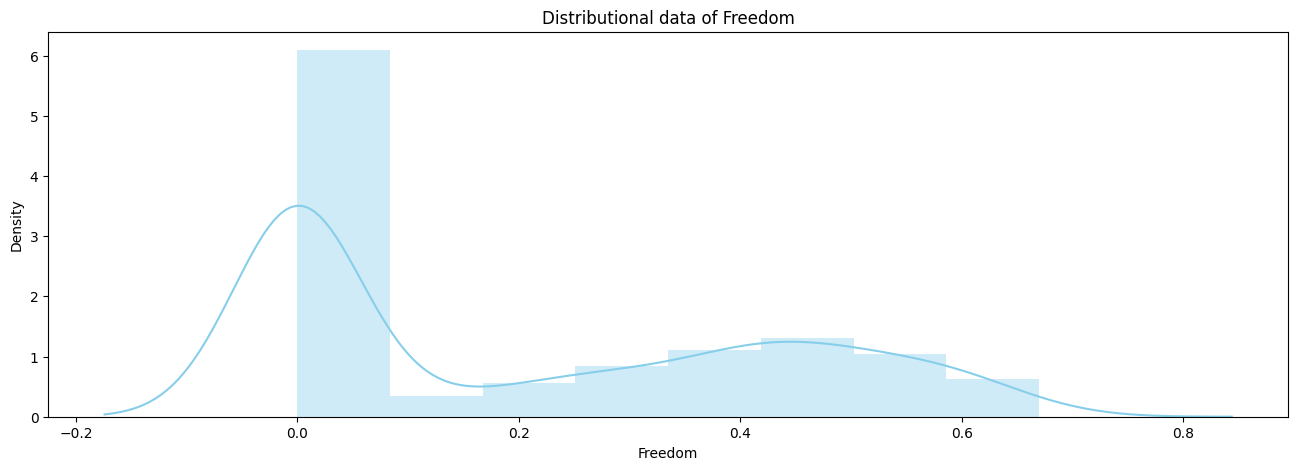

In [ ]:
f5, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Freedom"], color="skyblue",ax = axes)
plt.title("Distributional data of Freedom")

## Countplot of Happiness Country by Freedom

<ipython-input-35-da7375485dfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Freedom_c.Country, x=Freedom_c.Freedom, palette='magma')


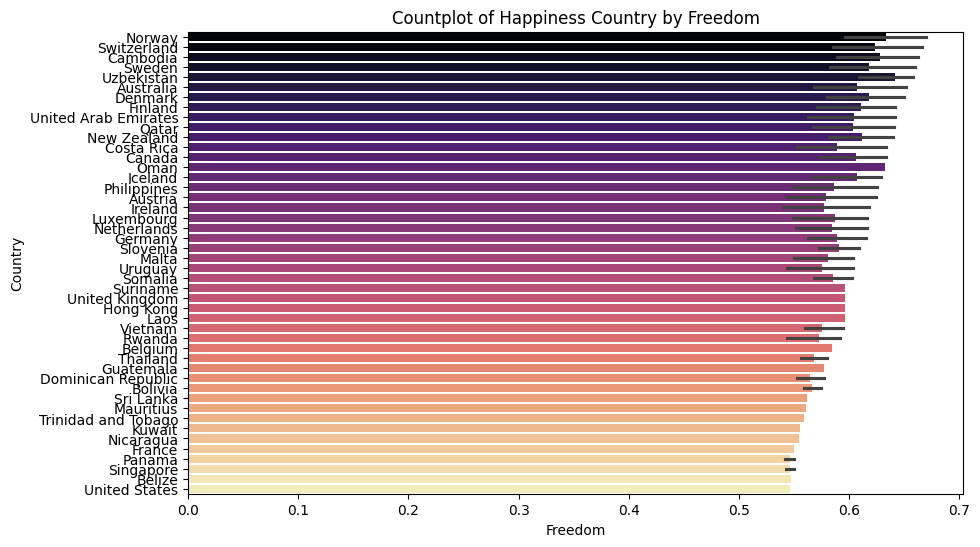

In [ ]:
Freedom_c = Data.sort_values(by='Freedom', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Freedom_c.Country, x=Freedom_c.Freedom, palette='magma')
plt.xticks()
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Freedom')
plt.show()

0.0~0.1의 자유도를 보이는 나라가 대부분인데 상위 100개국만 추출햇을때는 거의 0.5이상 나옴.

## 상위 10개국

<ipython-input-74-a6a38fac6aa1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Freedom_c.Country, x=Freedom_c.Freedom, palette='magma')


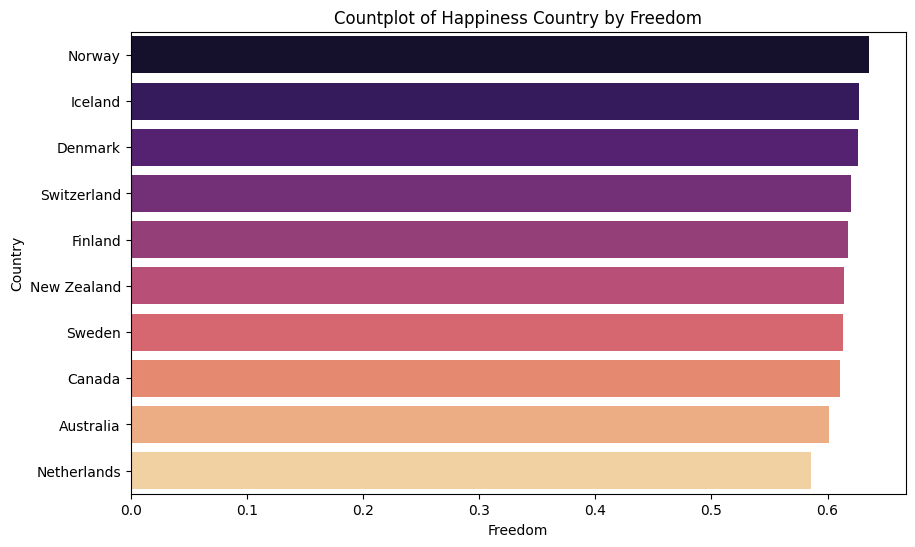

In [ ]:
# Happiness Score를 기준으로 내림차순으로 데이터를 정렬하여 상위 10개의 나라 선택
top_happy_countries = Data.sort_values(by='Happiness Score', ascending=False)[:10]

# 상위 10개 나라를 기준으로 자유도(Freedom)를 기준으로 다시 정렬
Freedom_c = top_happy_countries.sort_values(by='Freedom', ascending=False)

# 시각화
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Freedom_c.Country, x=Freedom_c.Freedom, palette='magma')
plt.xticks()
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Freedom')
plt.show()

# Happiness Country by Trust (Government Corruption)

In [ ]:
Data['Trust'] = Data['Trust (Government Corruption)']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank,Ecnomy_GDPperCapita,Trust
0,Switzerland,Western Europe,1.0,0.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.39651,0.41978
1,Iceland,Western Europe,2.0,0.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.30232,0.14145
2,Denmark,Western Europe,3.0,0.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,1.32548,0.48357
3,Norway,Western Europe,4.0,0.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,1.45900,0.36503
4,Canada,North America,5.0,0.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,1.32629,0.32957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0,0.00000,0.00000
931,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0,0.00000,0.00000
932,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0,0.00000,0.00000
933,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0,0.00000,0.00000


## Distributional data of Trust

<ipython-input-38-0ba3e1adca78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(Data["Trust"], color="green",ax = axes)


Text(0.5, 1.0, 'Distributional data of Trust')

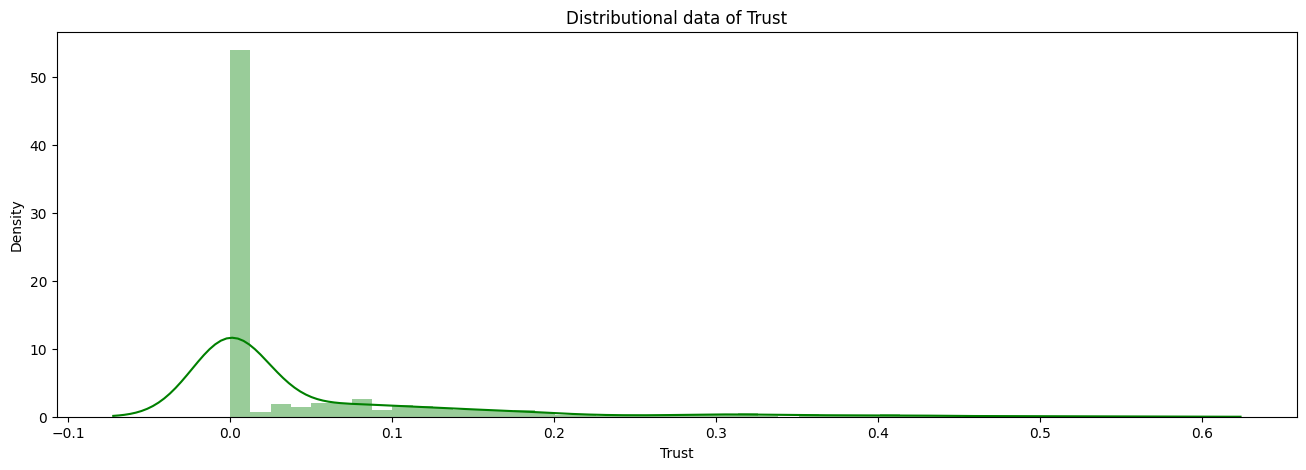

In [ ]:
f6, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Trust"], color="green",ax = axes)
plt.title("Distributional data of Trust")

## Countlot of Happiness Country by Trust

<ipython-input-42-ab795c4ae6af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Trust_c.Country, x=Trust_c.Trust, palette='mako')
<ipython-input-42-ab795c4ae6af>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(Data["Trust"], color="green",ax = axes)


Text(0.5, 1.0, 'Distributional data of Trust')

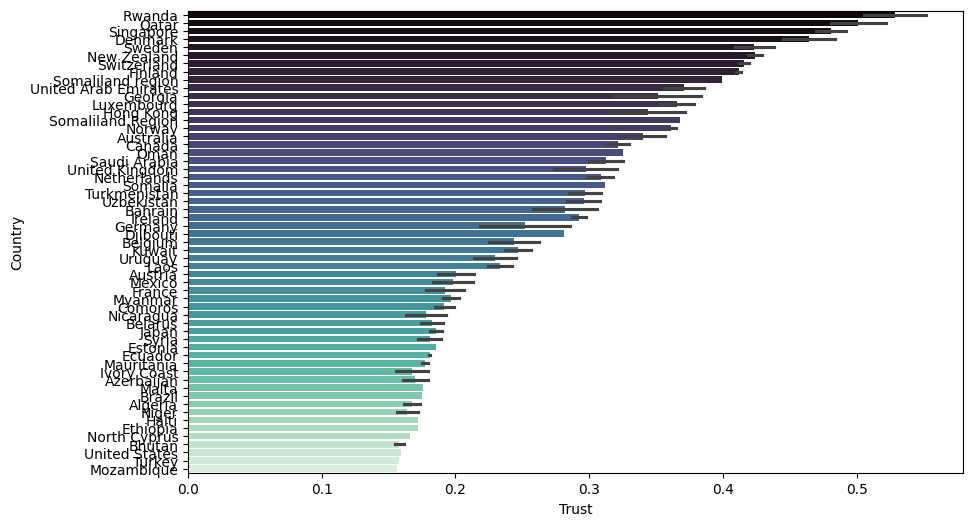

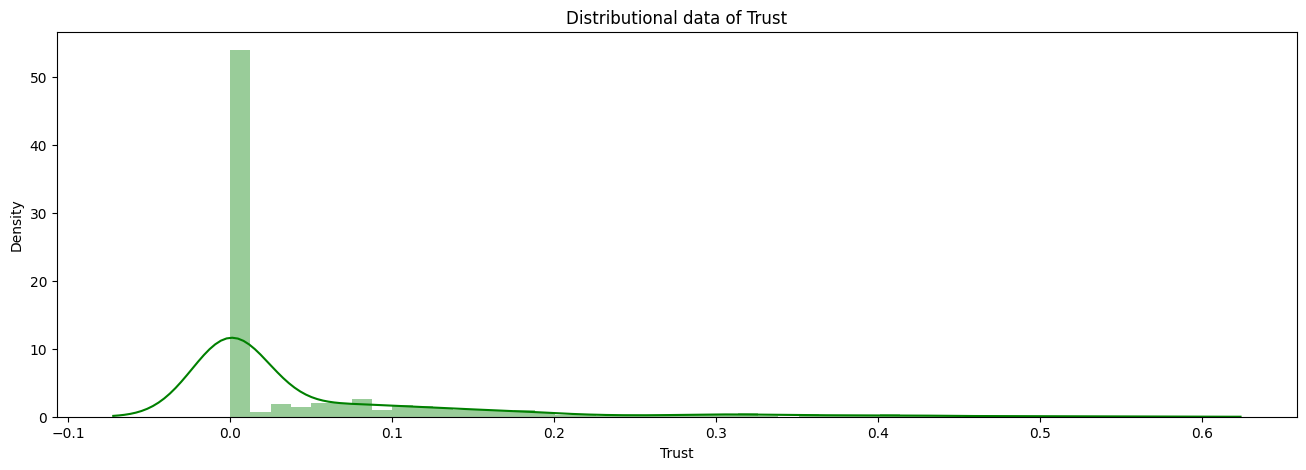

In [ ]:
Trust_c = Data.sort_values(by='Trust', ascending=False)[:10]

figure = plt.figure(figsize=(10,6))
sns.barplot(y=Trust_c.Country, x=Trust_c.Trust, palette='mako')
plt.xticks(rotation=45)  # x 축 레이블을 45도 회전하여 표시
plt.xlabel('Trust')
plt.ylabel('Country')
plt.title('Top 10 Happiness Countries by Trust')
plt.show()


## 상위 10개국

<ipython-input-77-92aa653fca05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Trust_c.Country, x=Trust_c.Trust, palette='mako')


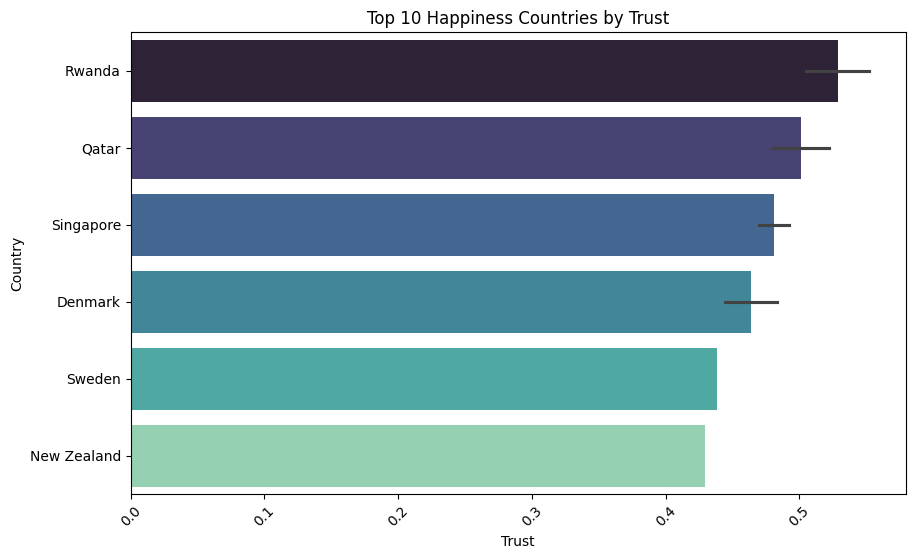

In [ ]:
# Happiness Score를 기준으로 내림차순으로 데이터를 정렬하여 상위 10개의 나라 선택
Trust_c = Data.sort_values(by='Trust', ascending=False)[:10]


figure = plt.figure(figsize=(10,6))
sns.barplot(y=Trust_c.Country, x=Trust_c.Trust, palette='mako')
plt.xticks(rotation=45)  # x 축 레이블을 45도 회전하여 표시
plt.xlabel('Trust')
plt.ylabel('Country')
plt.title('Top 10 Happiness Countries by Trust')
plt.show()


# Happiness Country by Health (Life Expectancy)

In [ ]:
Data['Health'] = Data['Health (Life Expectancy)']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank,Ecnomy_GDPperCapita,Trust,Health
0,Switzerland,Western Europe,1.0,0.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.39651,0.41978,0.94143
1,Iceland,Western Europe,2.0,0.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.30232,0.14145,0.94784
2,Denmark,Western Europe,3.0,0.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,1.32548,0.48357,0.87464
3,Norway,Western Europe,4.0,0.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,1.45900,0.36503,0.88521
4,Canada,North America,5.0,0.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,1.32629,0.32957,0.90563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0,0.00000,0.00000,0.00000
931,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0,0.00000,0.00000,0.00000
932,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0,0.00000,0.00000,0.00000
933,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0,0.00000,0.00000,0.00000


## **Distributional data of Health**

Text(0.5, 1.0, 'Distributional data of Health')

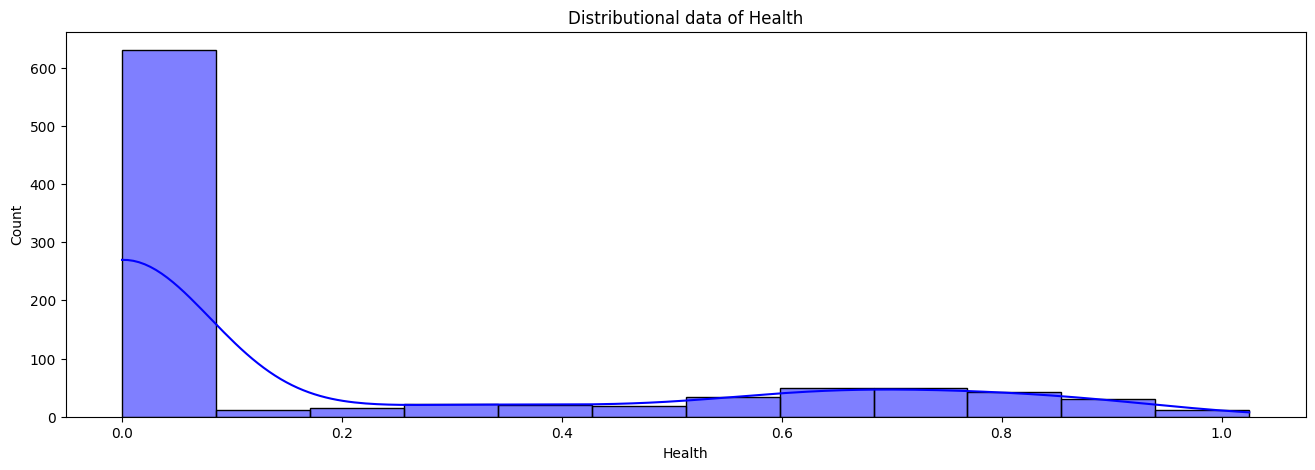

In [ ]:
f7, axes = plt.subplots(1,1, figsize= (16,5))
g1 = sns.histplot(Data["Health"], color='blue', ax=axes, kde=True) #커널밀도함수 함께 보여주기
plt.title('Distributional data of Health')

## **Countplot of Happiness Country by by Health**

<ipython-input-53-92556bde8b8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Health_c.Country, x=Health_c.Health, palette='rainbow')


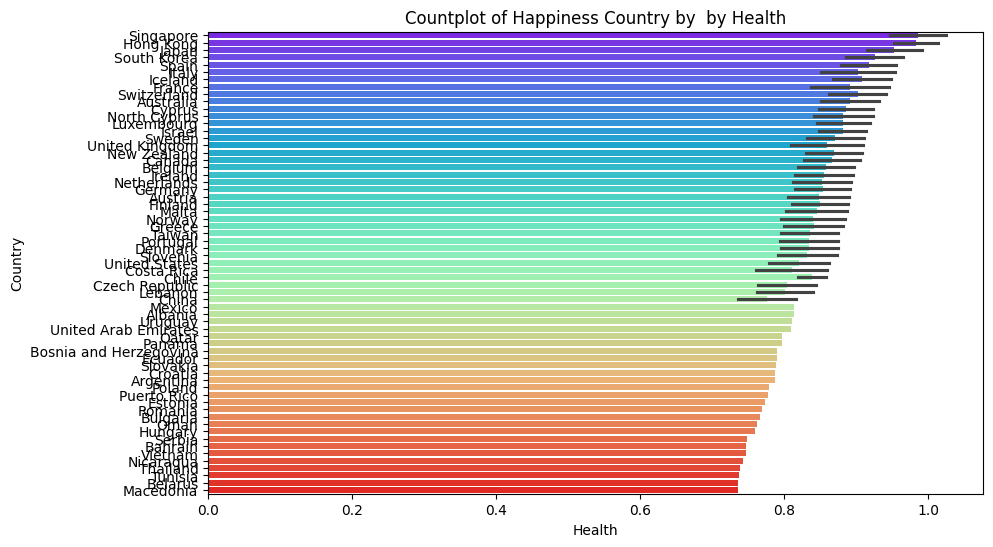

In [ ]:
Health_c = Data.sort_values(by='Health', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Health_c.Country, x=Health_c.Health, palette='rainbow')
plt.xticks()
plt.xlabel('Health')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by  by Health')
plt.show()

## 상위 10개국

<ipython-input-78-210989109c4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Health_c.Country, x=Health_c.Health, palette='mako')


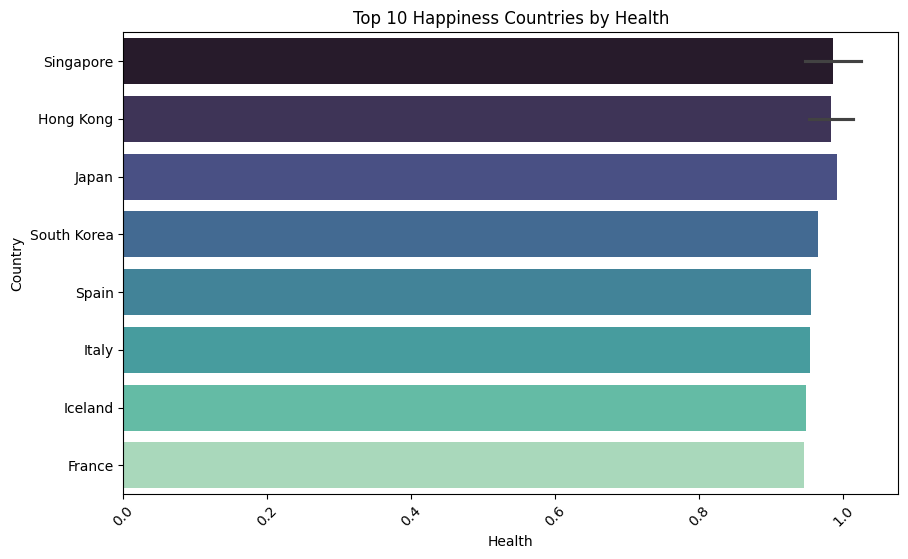

In [ ]:
# Happiness Score를 기준으로 내림차순으로 데이터를 정렬하여 상위 10개의 나라 선택
Health_c = Data.sort_values(by='Health', ascending=False)[:10]


figure = plt.figure(figsize=(10,6))
sns.barplot(y=Health_c.Country, x=Health_c.Health, palette='mako')
plt.xticks(rotation=45)  # x 축 레이블을 45도 회전하여 표시
plt.xlabel('Health')
plt.ylabel('Country')
plt.title('Top 10 Happiness Countries by Health')
plt.show()

# Comparing Trust (Government Corruption) each Country

Here we are comparing the Trust with each Country, first group the Country and get max,min and avg of Trust

In [ ]:
display(Data[["Country", "Trust",]].groupby(["Country"]).agg(["max", "mean", "min"]).style.background_gradient(cmap="Blues"))

In [ ]:
# "Trust" 열을 기준으로 그룹화하고 각 나라의 최대, 최소, 평균값을 계산한 후 시각화
trust_stats = Data[["Country", "Trust"]].groupby(["Country"]).agg(["max", "mean", "min"])

# 평균을 기준으로 내림차순 정렬하여 상위 10개 나라 선택
top_10_mean_trust_countries = trust_stats.sort_values(by=('Trust', 'mean'), ascending=False)[:10]

display(top_10_mean_trust_countries.style.background_gradient(cmap="Blues"))


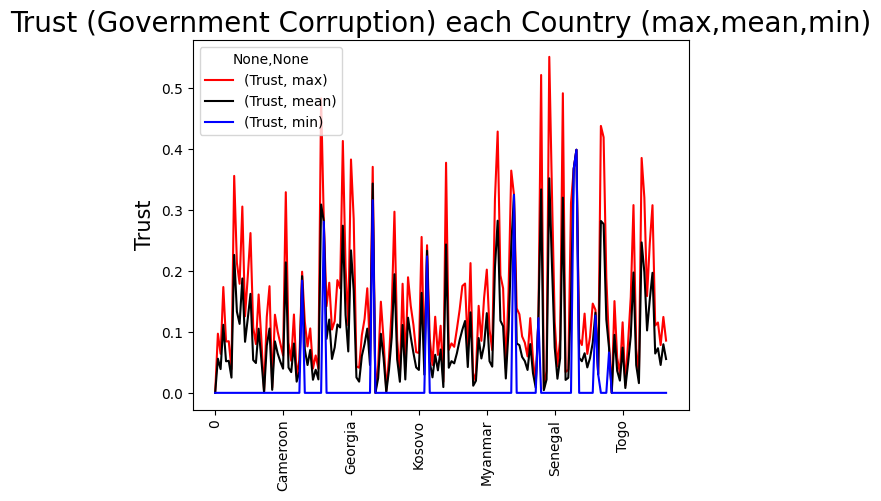

In [ ]:
# here we are ploting these values using lineplot

Data[["Country", "Trust",]].groupby(["Country"]).agg(["max", "mean", "min"]).plot(kind='line', color =['red', 'black', 'blue'])
plt.title("Trust (Government Corruption) each Country (max,mean,min)", fontsize=20)
plt.ylabel("Trust", fontsize=15)
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

# Comparing Freedom each Country

In [ ]:
display(Data[["Country", "Freedom", ]].groupby(["Country"]).agg(['max','mean','min']).style.background_gradient(cmap='BuPu_r'))

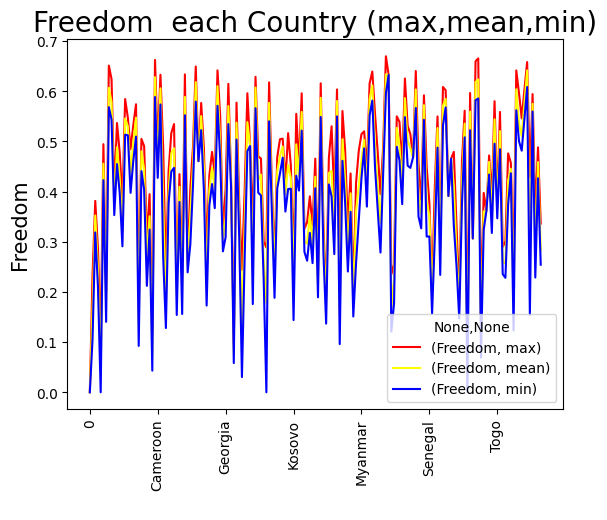

In [ ]:
Data[["Country", "Freedom", ]].groupby(['Country']).agg(['max','mean','min']).plot(kind='line',color=['red', 'yellow','blue'])
plt.title("Freedom  each Country (max,mean,min)", fontsize=20)
plt.ylabel("Freedom",fontsize=15)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

# Comparing Health (Life Expectancy) each Country

In [ ]:
display(Data[["Country","Health",]].groupby(["Country"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))

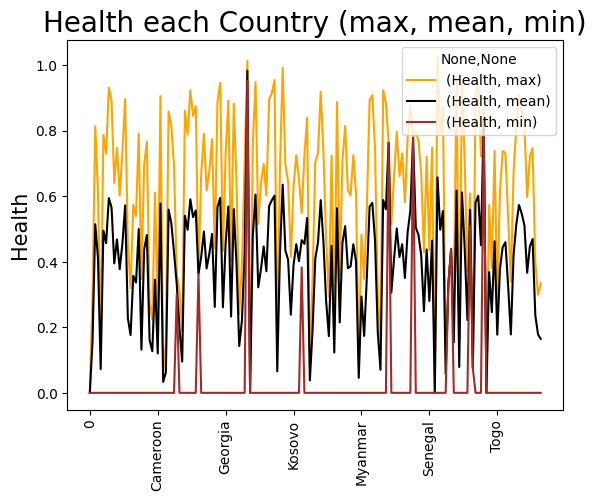

In [ ]:
Data[['Country', 'Health', ]].groupby(['Country']).agg(['max','mean','min']).plot(kind='line',color=['orange','black','brown'])
plt.title('Health each Country (max, mean, min)', fontsize=20)
plt.ylabel('Health', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()

# Comparing Economy GDP per Capita each Country

In [ ]:
display(Data[['Country', 'Economy (GDP per Capita)', ]].groupby(['Country']).agg(['max','mean','min']).style.background_gradient(cmap="CMRmap_r"))

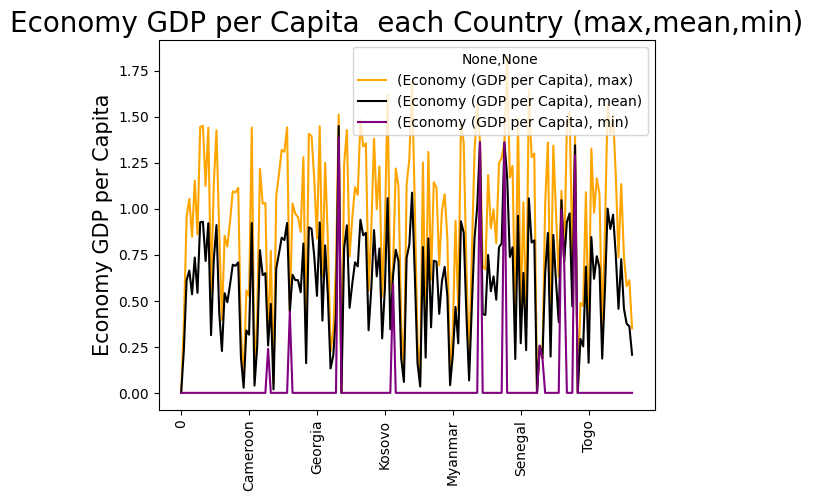

In [ ]:
Data[['Country', 'Economy (GDP per Capita)', ]].groupby(['Country']).agg(['max','mean','min']).plot(kind='line',color=['orange','black','purple'])
plt.title("Economy GDP per Capita  each Country (max,mean,min)", fontsize=20)
plt.ylabel('Economy GDP per Capita', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()

# Comparing Family each Country

In [ ]:
display(Data[["Country","Family",]].groupby(["Country"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="GnBu"))

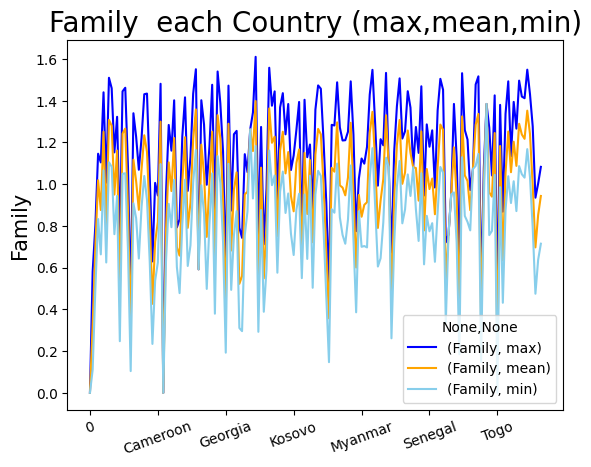

In [ ]:
# here we are ploting these values using lineplot

Data[["Country","Family",]].groupby(["Country"]).agg(["max",'mean',"min"]).plot(kind='line',
                                                                                color=['blue','orange','skyblue'])
plt.title("Family  each Country (max,mean,min)", fontsize=20)
plt.ylabel('Family', fontsize=15)
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()